In [2]:
# Import PyTorch and matplotlib
import torch
from torch import nn # nn contains all of PyTorch's building blocks for neural networks
import matplotlib.pyplot as plt

# Check PyTorch version
torch.__version__


'1.12.1'

In [3]:
# Setup device agnostic code
device = "cuda" if torch.cuda.is_available() else "cpu"
print(f"Using device: {device}")

Using device: cpu


In [4]:
x = torch.tensor([[0, 0], [0, 1], [1, 0], [1, 1]], dtype=torch.float32)
y = torch.tensor([[0], [0], [0], [1]], dtype=torch.float32)

In [5]:
if x.shape[0] == y.shape[0]:
    print("The shapes of our data match !")

The shapes of our data match !


In [6]:
class Perceptron(torch.nn.Module):
    def __init__(self, input_dim, output_dim):
        super(Perceptron, self).__init__()
        self.linear = torch.nn.Linear(input_dim, output_dim) # takes in {input_dim}  features (X), produces {output_dim} features
        self.activation = torch.nn.Sigmoid()
        
    def forward(self, x):
        # x = self.linear(x)
        # x = self.activation(x)
        ## The upper line and lower are equivalent
        x =self.activation(self.linear(x)) #Takes in the computation through the linear layer and the resulting features of the linear layer through the activation
        return x

# Example usage:
model = Perceptron(2, 1)
print(model)

Perceptron(
  (linear): Linear(in_features=2, out_features=1, bias=True)
  (activation): Sigmoid()
)


In [7]:
criterion = torch.nn.BCELoss()
optimizer = torch.optim.SGD(model.parameters(), lr=0.2)

In [8]:
num_epochs = 4000
loss_values = []
for epoch in range(num_epochs):
    optimizer.zero_grad()
    y_pred = model(x)
    loss = criterion(y_pred, y)
    loss.backward()
    optimizer.step()
    # Print the loss every 100 epochs
    loss_values.append(loss.item()) # This is so that we can look at an image of our loss
    if (epoch + 1) % 100 == 0:
        print(f'Epoch [{epoch+1}/{num_epochs}], Loss: {loss.item():.4f}')

Epoch [100/4000], Loss: 0.3232
Epoch [200/4000], Loss: 0.2395
Epoch [300/4000], Loss: 0.1916
Epoch [400/4000], Loss: 0.1599
Epoch [500/4000], Loss: 0.1372
Epoch [600/4000], Loss: 0.1200
Epoch [700/4000], Loss: 0.1065
Epoch [800/4000], Loss: 0.0957
Epoch [900/4000], Loss: 0.0869
Epoch [1000/4000], Loss: 0.0795
Epoch [1100/4000], Loss: 0.0732
Epoch [1200/4000], Loss: 0.0678
Epoch [1300/4000], Loss: 0.0632
Epoch [1400/4000], Loss: 0.0591
Epoch [1500/4000], Loss: 0.0555
Epoch [1600/4000], Loss: 0.0523
Epoch [1700/4000], Loss: 0.0494
Epoch [1800/4000], Loss: 0.0469
Epoch [1900/4000], Loss: 0.0445
Epoch [2000/4000], Loss: 0.0424
Epoch [2100/4000], Loss: 0.0405
Epoch [2200/4000], Loss: 0.0388
Epoch [2300/4000], Loss: 0.0371
Epoch [2400/4000], Loss: 0.0356
Epoch [2500/4000], Loss: 0.0343
Epoch [2600/4000], Loss: 0.0330
Epoch [2700/4000], Loss: 0.0318
Epoch [2800/4000], Loss: 0.0307
Epoch [2900/4000], Loss: 0.0297
Epoch [3000/4000], Loss: 0.0287
Epoch [3100/4000], Loss: 0.0278
Epoch [3200/4000]

In [9]:
from typing import List
def plot_loss(loss_values: List[float]):
    plt.plot(loss_values)
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.title('Training Loss Curve')
    plt.show()

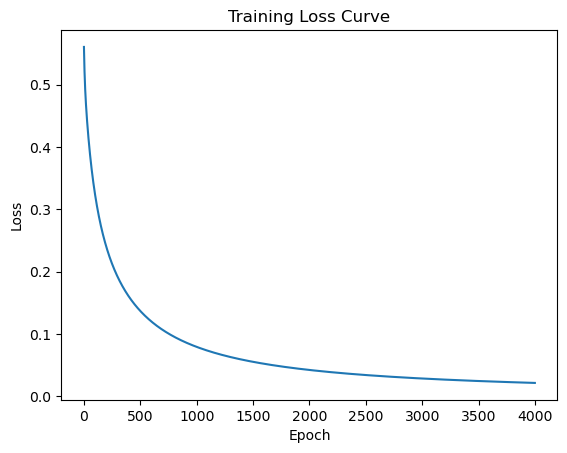

In [10]:
plot_loss(loss_values)

In [11]:
# Test the model on new data
test_input = torch.tensor([[0, 0], [0, 1], [1, 0], [1, 1]], dtype=torch.float32)
test_output = model(test_input)
print(test_output)


tensor([[2.4043e-05],
        [2.5062e-02],
        [2.5062e-02],
        [9.6489e-01]], grad_fn=<SigmoidBackward0>)


In [12]:
output = (test_output > 0.5).float()
print(output)

tensor([[0.],
        [0.],
        [0.],
        [1.]])


In [13]:
from pathlib import Path

# 1. Create models directory 
MODEL_PATH = Path("models")
MODEL_PATH.mkdir(parents=True, exist_ok=True)


# 2. Create model save path 
MODEL_NAME = "01_pytorch_perceptron.pth"
MODEL_SAVE_PATH = MODEL_PATH / MODEL_NAME

print(f"Saving model to: {MODEL_SAVE_PATH}")
torch.save(obj=model.state_dict(), # only saving the state_dict() only saves the models learned parameters
           f=MODEL_SAVE_PATH)

Saving model to: models\01_pytorch_perceptron.pth


In [14]:
# Calculate accuracy (a classification metric)
def accuracy_fn(y_true, y_pred):
    correct = torch.eq(y_true, y_pred).sum().item() # torch.eq() calculates where two tensors are equal
    acc = (correct / len(y_pred)) * 100 
    return acc

In [15]:
from sklearn.datasets import make_circles


# Make 2000 samples 
n_samples = 2000

# Create circles
X, y = make_circles(n_samples,
                    noise=0.05, # a little bit of noise to the dots
                    random_state=42) # keep random state so we get the same values

In [16]:
# Turn data into tensors
# Otherwise this causes issues with computations later on
X = torch.from_numpy(X).type(torch.float)
y = torch.from_numpy(y).type(torch.float)

In [17]:
print(f"Last 5 X features:\n{X[5:]}") #Wink wink numpy slicing
print(f"\Last 5 y labels:\n{y[5:]}")

Last 5 X features:
tensor([[-0.1930,  0.7703],
        [ 1.0001, -0.3373],
        [-0.1127, -0.8118],
        ...,
        [ 0.6222, -0.7182],
        [-0.7904,  0.1368],
        [ 0.5993,  0.5590]])
\Last 5 y labels:
tensor([1., 0., 1.,  ..., 0., 1., 1.])


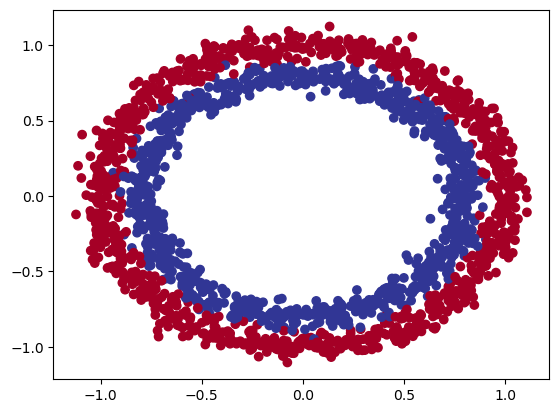

In [18]:
# Visualize with a plot
import matplotlib.pyplot as plt
plt.scatter(x=X[:, 0], 
            y=X[:, 1], 
            c=y, 
            cmap=plt.cm.RdYlBu);

In [19]:
# EXERCISE 1

# 1) Analyse the data: print the shape of our toy dataset
# 2) What's the second dimension on X?
# 3) Print some values of the toy dataset

# 1) Shapes

print("-------SHAPES--------")

print(X.shape)
print(x.shape)
print(y.shape)

print("------------ SECOND DIMENSION OF X ------------")

# 2) Second dimension of X
print(X[1].shape)
print(X.shape[1])

print("----------------------------------")

print(X[0][0])
print(X[0][1])
print(X[8][1])
print(X[12][0])

-------SHAPES--------
torch.Size([2000, 2])
torch.Size([4, 2])
torch.Size([2000])
------------ SECOND DIMENSION OF X ------------
torch.Size([2])
2
----------------------------------
tensor(0.4452)
tensor(-0.5584)
tensor(0.5010)
tensor(0.5864)


In [20]:
# EXERCISE 2

# In the next step, we need to prepare the data to be compatible 
# with PyTorch and for modelling. To achieve this, we have two 
# tasks to complete:

# 1) Convert our data from NumPy arrays to PyTorch tensors as PyTorch 
# works more efficiently with tensors. 
# 2) Create a split between the 
# training and testing sets. The model is trained on the training 
# set to learn the relationships between X and y. Afterward, the 
# model's learned patterns are evaluated on the test dataset.

# IMPORTS

from sklearn.model_selection import train_test_split
import numpy as np
# import tensorflow as tf

print("------------ PREPARE DATA ------------")
# 1) Prepare data

np_array = np.array(X)
X = torch.from_numpy(np_array).type(torch.float)
np_array = np.array(y)
y = torch.from_numpy(np_array).type(torch.float)

print(X)
print(y)

print("------------ SPLIT ------------")

# 2) SPLIT

X_train, X_test, y_train, y_test = train_test_split(X, 
                                                    y, 
                                                    test_size=0.2, # 20% test, 80% train
                                                    random_state=42) # make the random split reproducible
print("------------ PRINT TRAIN AND TEST ------------")
print(X_train)
print(X_test)
print(y_train)
print(y_test)
print("----------------------------------")


------------ PREPARE DATA ------------
tensor([[ 0.4452, -0.5584],
        [-0.6263,  0.8151],
        [-0.4009,  0.7175],
        ...,
        [ 0.6222, -0.7182],
        [-0.7904,  0.1368],
        [ 0.5993,  0.5590]])
tensor([1., 0., 1.,  ..., 0., 1., 1.])
------------ SPLIT ------------
------------ PRINT TRAIN AND TEST ------------
tensor([[-0.0709,  1.0931],
        [-0.0939, -0.9839],
        [-0.6134,  0.5505],
        ...,
        [ 0.6415, -0.7981],
        [ 0.2013,  0.6732],
        [ 0.4647,  1.0287]])
tensor([[-0.7558, -0.1428],
        [-0.6475, -0.5002],
        [-1.0110, -0.4071],
        [ 0.2052, -0.7927],
        [ 0.8038,  0.4801],
        [ 0.1112, -0.7711],
        [-0.4662,  0.8575],
        [ 0.1909,  0.9535],
        [ 0.4570, -0.6283],
        [-0.5262, -0.6966],
        [-0.0193,  0.7443],
        [ 0.7275, -0.6796],
        [ 0.9762,  0.2096],
        [ 0.9111, -0.2000],
        [-0.6834, -0.4817],
        [ 0.7922, -0.2268],
        [ 0.5785,  0.8733],
   

In [21]:
# EXERCISE 3

# 1) Build a model similar to the perceptron with 2 linear layers (no activation function) 
# Please be mindful of your model names (distinct names) 
# If capable move your model to the gpu

# imports
import torch
import torch.nn as nn
import torch.optim as optim
from collections import OrderedDict

# 1) MODEL BUILD

model_circle = nn.Sequential(
    nn.Linear(in_features=2, out_features=4), 
    nn.Linear(in_features=4, out_features=1)) # moves on the GPU

print("------------ MODEL CIRCLE ------------")
print(model_circle)
print("--------------------------------------")

from pathlib import Path

# 1. Create models directory 
MODEL_PATH = Path("models")
MODEL_PATH.mkdir(parents=True, exist_ok=True)


# 2. Create model save path 
MODEL_NAME = "02_pytorch_model_circle.pth"
MODEL_SAVE_PATH = MODEL_PATH / MODEL_NAME

print(f"Saving model to: {MODEL_SAVE_PATH}")
torch.save(obj=model.state_dict(), # only saving the state_dict() only saves the models learned parameters
           f=MODEL_SAVE_PATH)


------------ MODEL CIRCLE ------------
Sequential(
  (0): Linear(in_features=2, out_features=4, bias=True)
  (1): Linear(in_features=4, out_features=1, bias=True)
)
--------------------------------------
Saving model to: models\02_pytorch_model_circle.pth


In [22]:
# EXERCISE 4 

# 1) Create the recommended loss_fn and optimizer
print("------------ LOSS FUNCTION FOR BINARY CLASSIFICATION ------------")
loss_fn = torch.nn.BCEWithLogitsLoss() # old criterion
print(loss_fn)

print("------------ STOCHASTIC OPTIMIZER ------------")
optimizer = torch.optim.SGD(model_circle.parameters(), lr = 0.1)
# Not necessary here (optimizer_circle_Adam = torch.optim.Adam(model_circle.parameters(),lr = 0.1))
print(optimizer)

# 2) Evaluate model
print("------------ X TEST OUTPUT ------------")
X_test_output = model_circle(X_test)
print(X_test_output)

print("--------------------------------------")

------------ LOSS FUNCTION FOR BINARY CLASSIFICATION ------------
BCEWithLogitsLoss()
------------ STOCHASTIC OPTIMIZER ------------
SGD (
Parameter Group 0
    dampening: 0
    foreach: None
    lr: 0.1
    maximize: False
    momentum: 0
    nesterov: False
    weight_decay: 0
)
------------ X TEST OUTPUT ------------
tensor([[-0.4841],
        [-0.5158],
        [-0.4554],
        [-0.6605],
        [-0.7008],
        [-0.6450],
        [-0.4877],
        [-0.5858],
        [-0.6929],
        [-0.5428],
        [-0.5618],
        [-0.7370],
        [-0.7388],
        [-0.7457],
        [-0.5094],
        [-0.7283],
        [-0.6494],
        [-0.6067],
        [-0.4708],
        [-0.4766],
        [-0.4423],
        [-0.5178],
        [-0.5884],
        [-0.7201],
        [-0.7174],
        [-0.7268],
        [-0.6602],
        [-0.4805],
        [-0.7422],
        [-0.7562],
        [-0.4386],
        [-0.7080],
        [-0.4934],
        [-0.6580],
        [-0.6766],
        [-0.6

Epoch [10/100], Loss: 0.7130, Acc_train: 775.8987, Acc_test: 191.5825
Epoch [20/100], Loss: 0.7014, Acc_train: 803.0000, Acc_test: 197.0000
Epoch [30/100], Loss: 0.6967, Acc_train: 803.0000, Acc_test: 197.0000
Epoch [40/100], Loss: 0.6948, Acc_train: 803.0000, Acc_test: 197.0000
Epoch [50/100], Loss: 0.6940, Acc_train: 803.0000, Acc_test: 197.0000
Epoch [60/100], Loss: 0.6937, Acc_train: 803.0000, Acc_test: 197.0000
Epoch [70/100], Loss: 0.6935, Acc_train: 803.0000, Acc_test: 197.0000
Epoch [80/100], Loss: 0.6934, Acc_train: 803.0000, Acc_test: 197.0000
Epoch [90/100], Loss: 0.6934, Acc_train: 803.0000, Acc_test: 197.0000
Epoch [100/100], Loss: 0.6933, Acc_train: 803.0000, Acc_test: 197.0000
------------ DECISION BOUNDARIES ------------


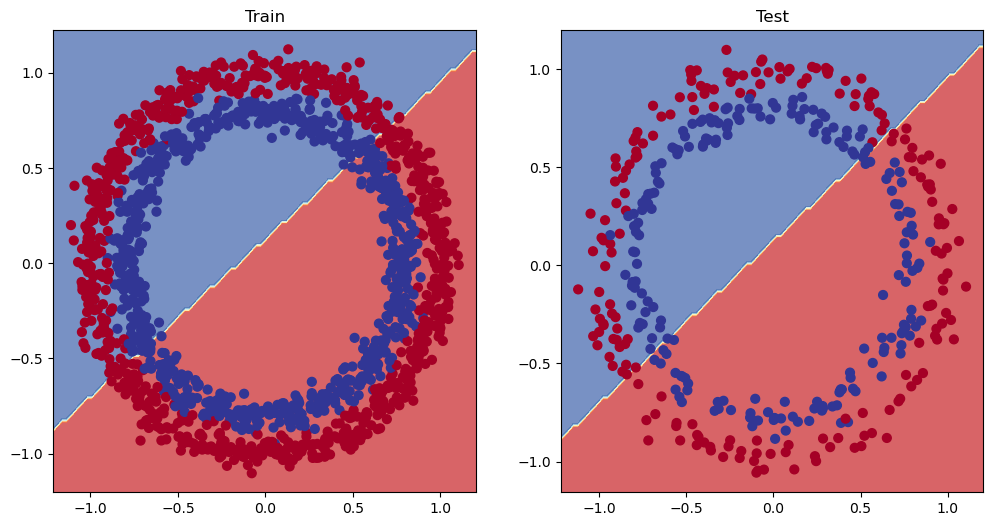

------------ LOSS CURVE ------------


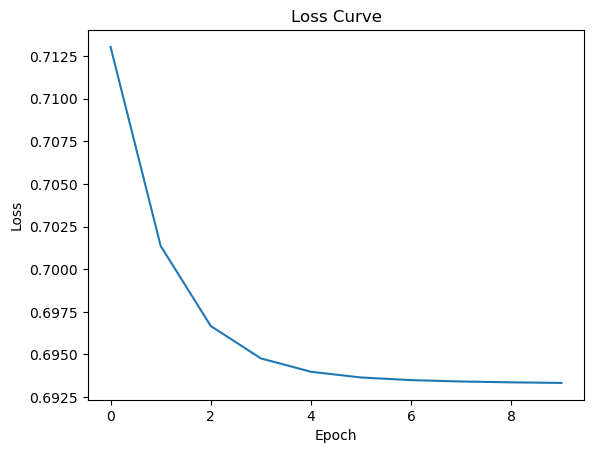

------------ ACC CURVE ------------


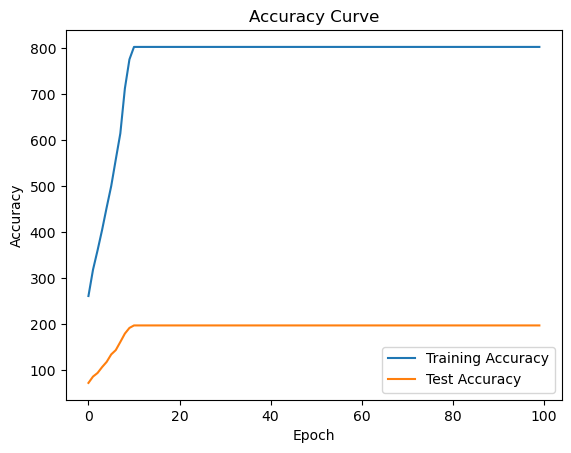

--------------------------------------


In [23]:
# EXERCISE 5 

# 1) Build the training loop
# Every 10 epochs rint the loss and the accuracy and save them in a loss_curve, acc_curve
# 2) Also plot them

from utils import plot_decision_boundary
import matplotlib.pyplot as plt

num_epochs = 100
loss_curve = []
acc_curve=[]
train_acc_curve = []
test_acc_curve = []
y = y.view(-1, 1)

for epoch in range(num_epochs):
    # Train model_circle
    optimizer.zero_grad()
    y_pred_circle = model_circle(X)
    loss_circle = loss_fn(y_pred_circle,y)
    loss_circle.backward()
    optimizer.step()
    
    # Compute accuracy on training set
    y_pred_train = model_circle(X_train).round()
    acc_train = (y_pred_train == y_train).sum().item() / len(y_train)
    train_acc_curve.append(acc_train)

    # Compute accuracy on test set
    y_pred_test = model_circle(X_test).round()
    acc_test = (y_pred_test == y_test).sum().item() / len(y_test)
    test_acc_curve.append(acc_test)

    # Print loss and accuracy every 10 epochs
    if (epoch + 1) % 10 == 0:
        print(f"Epoch [{epoch+1}/{num_epochs}], Loss: {loss_circle.item():.4f}, Acc_train: {acc_train:.4f}, Acc_test: {acc_test:.4f}")
    
        # Save loss and accuracy for plotting
        loss_curve.append(loss_circle.item())
        acc_curve.append(acc_test)

print("------------ DECISION BOUNDARIES ------------")
# Plot decision boundaries for training and test sets
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.title("Train")
plot_decision_boundary(model_circle, X_train, y_train)
plt.subplot(1, 2, 2)
plt.title("Test")
plot_decision_boundary(model_circle, X_test, y_test)
plt.show()

print("------------ LOSS CURVE ------------")
# Plot loss curve
plt.plot(loss_curve)
plt.title("Loss Curve")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.show()

print("------------ ACC CURVE ------------")
# Plot accuracy curve
plt.plot(train_acc_curve, label="Training Accuracy")
plt.plot(test_acc_curve, label="Test Accuracy")
plt.title("Accuracy Curve")
plt.xlabel("Epoch")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

print("--------------------------------------")

tensor([-10.,  -9.,  -8.,  -7.,  -6.,  -5.,  -4.,  -3.,  -2.,  -1.,   0.,   1.,
          2.,   3.,   4.,   5.,   6.,   7.,   8.,   9.])
------------- RELU ---------------


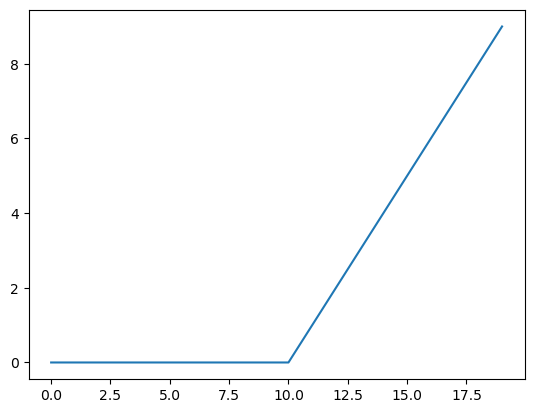

----------- MODEL CIRCLE WITH ACTIVATION FUNCTIONS -------------
Sequential(
  (0): Linear(in_features=2, out_features=4, bias=True)
  (1): ReLU()
  (2): Sigmoid()
  (3): Linear(in_features=4, out_features=1, bias=True)
)
Saving model to: models\03_pytorch_model_circle_with_activation_function.pth


In [24]:
# EXERCISE 6

# Create a toy tensor (similar to the data going into our model(s))
input_dummy = torch.arange(-10, 10, 1, dtype=torch.float32)
print(input_dummy)
print("------------- RELU ---------------")

def relu(x):
    zero_tensor = torch.tensor(0, dtype=torch.float32)
    return torch.max(zero_tensor, x) # inputs must be tensors

# Pass toy tensor through ReLU function
output = relu(input_dummy)


plt.plot(output)
plt.show()
print("----------- MODEL CIRCLE WITH ACTIVATION FUNCTIONS -------------")

model_circle_with_activation_function = nn.Sequential(
    nn.Linear(in_features=2, out_features=4), 
    nn.ReLU(),
    nn.Sigmoid(),
    nn.Linear(in_features=4, out_features=1))

print(model_circle_with_activation_function)

from pathlib import Path

# 1. Create models directory 
MODEL_PATH = Path("models")
MODEL_PATH.mkdir(parents=True, exist_ok=True)


# 2. Create model save path 
MODEL_NAME = "03_pytorch_model_circle_with_activation_function.pth"
MODEL_SAVE_PATH = MODEL_PATH / MODEL_NAME

print(f"Saving model to: {MODEL_SAVE_PATH}")
torch.save(obj=model.state_dict(), # only saving the state_dict() only saves the models learned parameters
           f=MODEL_SAVE_PATH)

------------ STOCHASTIC OPTIMIZER ------------
SGD (
Parameter Group 0
    dampening: 0
    foreach: None
    lr: 0.3
    maximize: False
    momentum: 0
    nesterov: False
    weight_decay: 0
)
------------ X TEST OUTPUT ------------
tensor([[-1.0964e-03],
        [-1.1709e-02],
        [-6.7334e-02],
        [ 5.9379e-03],
        [-3.1081e-02],
        [ 6.4348e-03],
        [ 1.3456e-02],
        [-2.9144e-02],
        [ 4.3878e-02],
        [-7.1306e-03],
        [ 1.3411e-02],
        [ 1.7123e-02],
        [-5.2824e-02],
        [-1.3554e-02],
        [-1.6896e-02],
        [ 1.1642e-02],
        [-3.6869e-02],
        [-6.0488e-03],
        [ 1.9463e-02],
        [-6.2831e-03],
        [-8.3417e-03],
        [ 4.3408e-02],
        [-1.9479e-03],
        [-4.6931e-02],
        [ 8.0659e-03],
        [ 2.6042e-02],
        [ 1.6245e-02],
        [ 3.1116e-02],
        [ 1.0333e-02],
        [-6.5520e-02],
        [-1.9218e-02],
        [-2.6701e-03],
        [ 3.4959e-02],
     

Epoch [100/10000], Loss: 0.6832, Acc_train: 803.0000, Acc_test: 197.0000
Epoch [200/10000], Loss: 0.6816, Acc_train: 803.0000, Acc_test: 197.0000
Epoch [300/10000], Loss: 0.6797, Acc_train: 803.0000, Acc_test: 197.0000
Epoch [400/10000], Loss: 0.6775, Acc_train: 803.0000, Acc_test: 197.0000
Epoch [500/10000], Loss: 0.6751, Acc_train: 803.0000, Acc_test: 197.0000
Epoch [600/10000], Loss: 0.6723, Acc_train: 803.0000, Acc_test: 197.0000
Epoch [700/10000], Loss: 0.6692, Acc_train: 803.0000, Acc_test: 197.0000
Epoch [800/10000], Loss: 0.6657, Acc_train: 803.0000, Acc_test: 197.0000
Epoch [900/10000], Loss: 0.6619, Acc_train: 803.0000, Acc_test: 197.0000
Epoch [1000/10000], Loss: 0.6578, Acc_train: 803.0000, Acc_test: 197.0000
Epoch [1100/10000], Loss: 0.6533, Acc_train: 803.0000, Acc_test: 197.0000
Epoch [1200/10000], Loss: 0.6486, Acc_train: 803.0000, Acc_test: 197.0000
Epoch [1300/10000], Loss: 0.6436, Acc_train: 803.0000, Acc_test: 197.0000
Epoch [1400/10000], Loss: 0.6383, Acc_train: 80

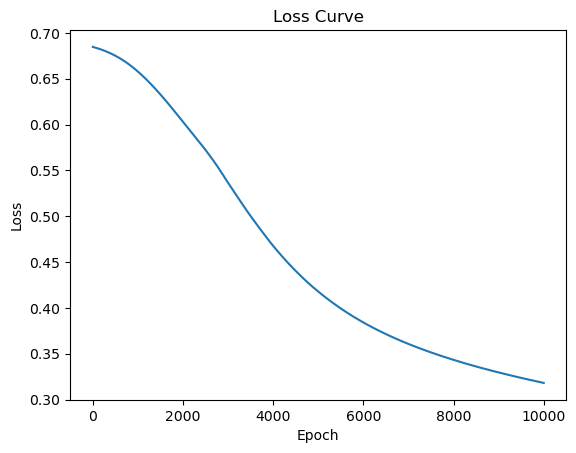

------------ ACC CURVE ------------


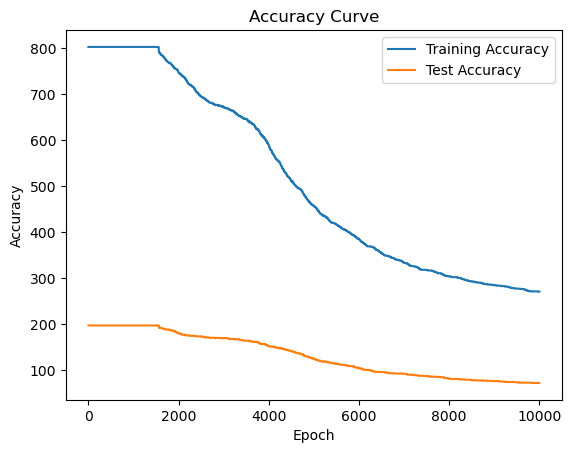

--------------------------------------


In [27]:
# EXERCISE 7

# 7) Recreate the optimizer and training loop

# OPTIMIZER
print("------------ STOCHASTIC OPTIMIZER ------------")
optimizer_2 = torch.optim.SGD(model_circle_with_activation_function.parameters(), lr = 0.3)
print(optimizer_2)

# 2) Evaluate model
print("------------ X TEST OUTPUT ------------")
X_test_output = model_circle_with_activation_function(X_test)
print(X_test_output)

print("---------------------------------------")


print("----------- TRAINING ------------")

# TRAINING LOOP

from utils import plot_decision_boundary
import matplotlib.pyplot as plt

num_epochs = 1000
loss_curve = []
acc_curve=[]
train_acc_curve = []
test_acc_curve = []
y = y.view(-1, 1)

for epoch in range(num_epochs):
    # Train model_circle
    optimizer_2.zero_grad()
    y_pred_circle = model_circle_with_activation_function(X)
    loss_circle = loss_fn(y_pred_circle,y)
    loss_circle.backward()
    optimizer_2.step()
    
    # Compute accuracy on training set
    y_pred_train = model_circle_with_activation_function(X_train).round()
    acc_train = (y_pred_train == y_train).sum().item() / len(y_train)
    train_acc_curve.append(acc_train)

    # Compute accuracy on test set
    y_pred_test = model_circle_with_activation_function(X_test).round()
    acc_test = (y_pred_test == y_test).sum().item() / len(y_test)
    test_acc_curve.append(acc_test)

    # Print loss and accuracy every 10 epochs
    if (epoch + 1) % 100 == 0:
        print(f"Epoch [{epoch+1}/{num_epochs}], Loss: {loss_circle.item():.4f}, Acc_train: {acc_train:.4f}, Acc_test: {acc_test:.4f}")
    
    # Save loss and accuracy for plotting
    loss_curve.append(loss_circle.item())
    acc_curve.append(acc_test)
    

print("------------ LOSS CURVE ------------")
# Plot loss curve
plt.plot(loss_curve)
plt.title("Loss Curve")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.show()

print("------------ ACC CURVE ------------")
# Plot accuracy curve
plt.plot(train_acc_curve, label="Training Accuracy")
plt.plot(test_acc_curve, label="Test Accuracy")
plt.title("Accuracy Curve")
plt.xlabel("Epoch")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

print("--------------------------------------")

------------ DECISION BOUNDARIES ------------


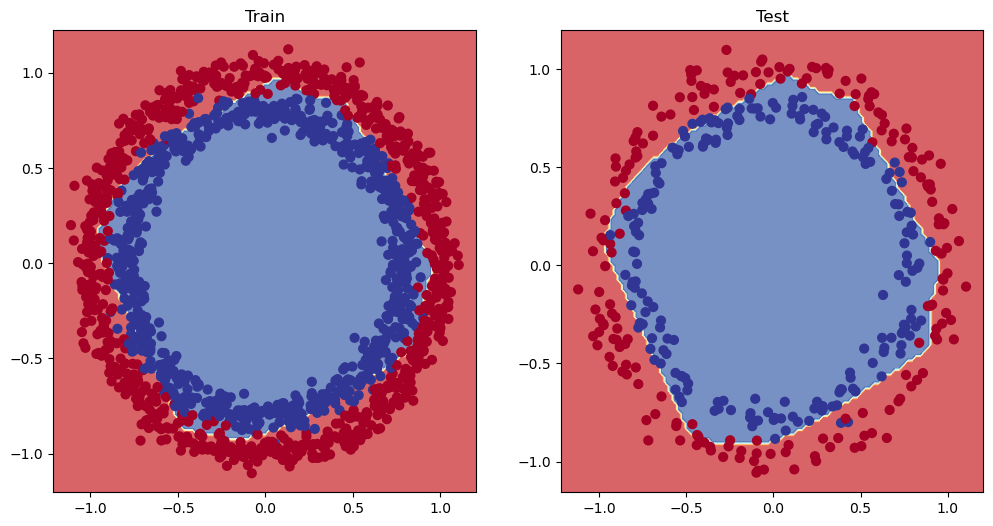

In [28]:
# EXERCISE 8

print("------------ DECISION BOUNDARIES ------------")
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.title("Train")
plot_decision_boundary(model_circle_with_activation_function, X_train, y_train)
plt.subplot(1, 2, 2)
plt.title("Test")
plot_decision_boundary(model_circle_with_activation_function, X_test, y_test)

tensor([[-1.6735,  7.8846],
        [ 6.3176,  1.4196],
        [ 3.5436,  0.5331],
        [ 5.1627,  1.3995],
        [ 4.4594,  5.1663]]) tensor([0, 1, 1, 1, 1])


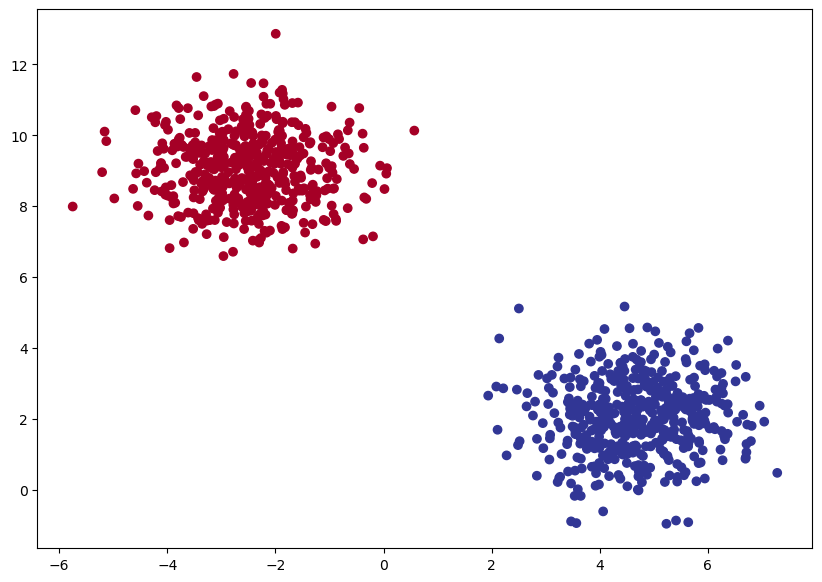

In [31]:
# Theory multiclass classification

# Import dependencies
import torch
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs
from sklearn.model_selection import train_test_split

# Set the hyperparameters for data creation
NUM_CLASSES = 2
NUM_FEATURES = 2
RANDOM_SEED = 42

# 1. Create multi-class data
X_blob, y_blob = make_blobs(n_samples=1000,
    n_features=NUM_FEATURES, # X features
    centers=NUM_CLASSES, # y labels 
    cluster_std=1.0, # give the clusters a little shake up (try changing this to 1.0, the default)
    random_state=RANDOM_SEED
)

# 2. Turn data into tensors
X_blob = torch.from_numpy(X_blob).type(torch.float)
y_blob = torch.from_numpy(y_blob).type(torch.LongTensor)
print(X_blob[:5], y_blob[:5])

# 3. Split into train and test sets
X_blob_train, X_blob_test, y_blob_train, y_blob_test = train_test_split(X_blob,
    y_blob,
    test_size=0.2,
    random_state=RANDOM_SEED
)

# 4. Plot data
plt.figure(figsize=(10, 7))
plt.scatter(X_blob[:, 0], X_blob[:, 1], c=y_blob, cmap=plt.cm.RdYlBu);

------------ 1) MULTI-CLASS BLOBS ------------
------------ 2) DATA INTO TENSORS ------------
tensor([[-8.5550,  7.0646],
        [-6.1375, -6.5808],
        [-6.3213, -6.8041],
        [ 4.1805,  1.1233],
        [ 4.3803,  0.4700]]) tensor([3, 2, 2, 1, 1])
------------ 3) SPLIT DATA INTO TRAIN AND TEST ------------
------------ 4) PLOT ------------


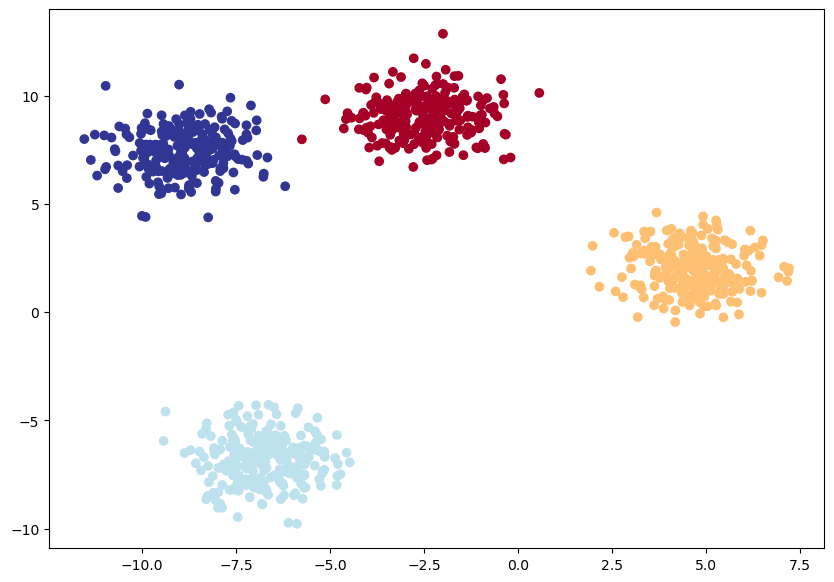

------------ 5) MODEL ------------
Sequential(
  (0): Linear(in_features=2, out_features=4, bias=True)
  (1): Linear(in_features=4, out_features=4, bias=True)
  (2): Linear(in_features=4, out_features=4, bias=True)
)
Saving model to: models\04_pytorch_model_final.pth
------------ 6) LOSS FUNCTION FOR BINARY CLASSIFICATION ------------
CrossEntropyLoss()
------------ STOCHASTIC OPTIMIZER ------------
SGD (
Parameter Group 0
    dampening: 0
    foreach: None
    lr: 0.1
    maximize: False
    momentum: 0
    nesterov: False
    weight_decay: 0
)
------------ 7) TRAIN THE NETWORK ------------
------------ X TEST OUTPUT ------------
tensor([[-5.9848e-02, -7.8253e-01, -2.5323e+00, -6.2101e-01],
        [-2.5921e-01,  1.3170e+00,  1.9495e+00,  1.3255e+00],
        [-4.5078e-01,  1.7618e+00,  2.8945e+00,  1.0847e+00],
        [-1.0698e-01, -5.5168e-01, -2.0402e+00, -5.1726e-01],
        [-7.3255e-02, -1.1980e-01, -1.1160e+00,  2.1003e-01],
        [-2.7184e-01,  1.4891e+00,  2.3170e+00,  1.

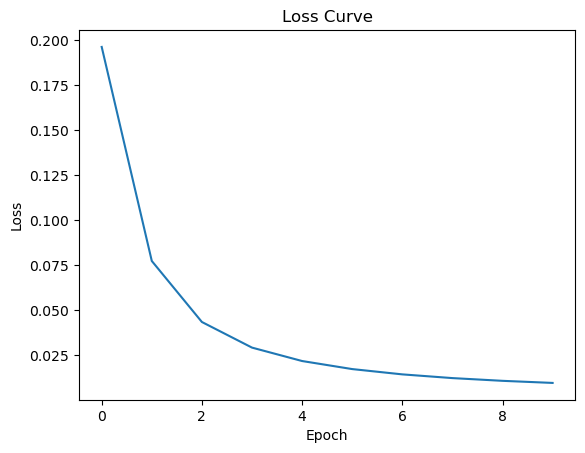

------------ ACC CURVE ------------


RuntimeError: Can't call numpy() on Tensor that requires grad. Use tensor.detach().numpy() instead.

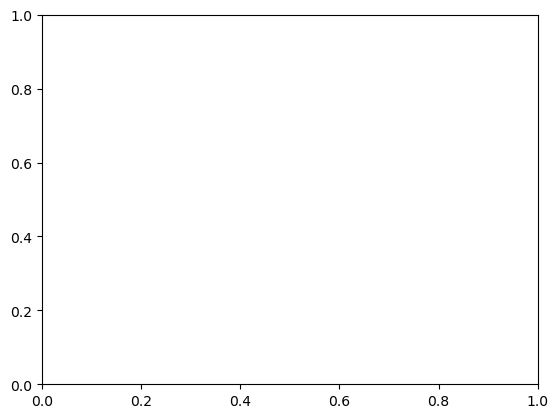

In [32]:
# EXERCISE 9

import torch
import torch.nn as nn
import torch.optim as optim
from sklearn.datasets import make_blobs
from sklearn.model_selection import train_test_split

# Set the hyperparameters for data creation
NUM_CLASSES = 4
NUM_FEATURES = 2
RANDOM_SEED = 42

print("------------ 1) MULTI-CLASS BLOBS ------------")

# 1. Create multi-class data
X_blob, y_blob = make_blobs(n_samples=1000,
    n_features=NUM_FEATURES, # X features
    centers=NUM_CLASSES, # y labels 
    cluster_std=1.0, # give the clusters a little shake up (try changing this to 1.0, the default)
    random_state=RANDOM_SEED
)

# print(X_blob)
# print(y_blob)

print("------------ 2) DATA INTO TENSORS ------------")
# 2. Turn data into tensors
X_blob = torch.from_numpy(X_blob).type(torch.float)
y_blob = torch.from_numpy(y_blob).type(torch.LongTensor)
print(X_blob[:5], y_blob[:5])

# print(X_blob)
# print(y_blob)

# 3. Split into train and test sets
print("------------ 3) SPLIT DATA INTO TRAIN AND TEST ------------")
X_blob_train, X_blob_test, y_blob_train, y_blob_test = train_test_split(X_blob,
    y_blob,
    test_size=0.2,
    random_state=RANDOM_SEED
)

# Some testing I did to see the sizes, for a size error happening
# print("------------------------AAAAAAAAAAAAAAAAA----------------------------")
# print(X_blob_train.size())
# print(X_blob_test.size())
# print(y_blob_train.size())
# print(y_blob_test.size())
# print("-------------AAAAAAAAAAAAAAAAAA---------------------------------------")


# 4. Plot data
print("------------ 4) PLOT ------------")
plt.figure(figsize=(10, 7))
plt.scatter(X_blob[:, 0], X_blob[:, 1], c=y_blob, cmap=plt.cm.RdYlBu);
plt.show();

# 5. Create model
print("------------ 5) MODEL ------------")
model_final = nn.Sequential(
    nn.Linear(in_features=2, out_features=4), 
    nn.Linear(in_features=4, out_features=4),
    nn.Linear(in_features=4, out_features=NUM_CLASSES))
print(model_final)

from pathlib import Path

# 1. Create models directory 
MODEL_PATH = Path("models")
MODEL_PATH.mkdir(parents=True, exist_ok=True)


# 2. Create model save path 
MODEL_NAME = "04_pytorch_model_final.pth"
MODEL_SAVE_PATH = MODEL_PATH / MODEL_NAME

print(f"Saving model to: {MODEL_SAVE_PATH}")
torch.save(obj=model.state_dict(), # only saving the state_dict() only saves the models learned parameters
           f=MODEL_SAVE_PATH)

# 6. Define the loss function and optimizer
print("------------ 6) LOSS FUNCTION FOR BINARY CLASSIFICATION ------------")
loss_final = torch.nn.CrossEntropyLoss() # old criterion
print(loss_final)

print("------------ STOCHASTIC OPTIMIZER ------------")
optimizer_final = torch.optim.SGD(model_final.parameters(), lr = 0.1)
# Not necessary here (optimizer_circle_Adam = torch.optim.Adam(model_circle.parameters(),lr = 0.1))
print(optimizer_final)


# 7. Train the network
print("------------ 7) TRAIN THE NETWORK ------------")

print("------------ X TEST OUTPUT ------------")
X_test_output = model_final(X_blob_test)
print(X_test_output)

print("---------------------------------------")


print("----------- TRAINING ------------")

# TRAINING LOOP

from utils import plot_decision_boundary
import matplotlib.pyplot as plt

num_epochs = 100
loss_curve = []
acc_curve=[]
train_acc_curve = []
test_acc_curve = []
loss_final2 = 0

for epoch in range(num_epochs):
    # Train model_final
    optimizer_final.zero_grad()
    y_pred_circle = model_final(X_blob)
    loss_final2 = loss_final(y_pred_circle,y_blob)
    loss_final2.backward()
    optimizer_final.step()
    
    # Compute accuracy on training set
    y_pred_train = model_final(X_blob_train).round()
    y_pred_train_reshaped = y_pred_train.view(-1,800)
    # print(y_pred_train.size())
    # print(y_blob_train.size())
    # acc_train = (y_pred_train_reshaped == y_blob_train).sum().item() / len(y_blob_train)
    loss_final_train = loss_final(y_pred_train,y_blob_train)
    acc_train = 1 - loss_final_train
    train_acc_curve.append(acc_train)

    # Compute accuracy on test set
    y_pred_test = model_final(X_blob_test).round()
    y_pred_test_reshaped = y_pred_test.view(-1,200)
    # acc_test = (y_pred_test_reshaped == y_blob_test).sum().item() / len(y_blob_test)
    loss_final_test = loss_final(y_pred_test,y_blob_test)
    acc_test = 1 - loss_final_test
    test_acc_curve.append(acc_test)

    # Print loss and accuracy every 10 epochs
    if (epoch + 1) % 10 == 0:
        print(f"Epoch [{epoch+1}/{num_epochs}], Loss: {loss_final2.item():.4f}, Acc_train: {acc_train:.4f}, Acc_test: {acc_test:.4f}")
    
        # Save loss and accuracy for plotting
        loss_curve.append(loss_final2.item())
        acc_curve.append(acc_test)

print("------------ LOSS CURVE ------------")
# Plot loss curve
plt.plot(loss_curve)
plt.title("Loss Curve")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.show()

print("------------ ACC CURVE ------------")
# Plot accuracy curve
plt.plot(train_acc_curve, label="Training Accuracy")
plt.plot(test_acc_curve, label="Test Accuracy")
plt.title("Accuracy Curve")
plt.xlabel("Epoch")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

print("--------------------------------------")

# 8. Evaluate the network on the test set

print("--------------------------------------------")
print(f"Accuracy: {(1 - loss_final2)*100}%")

